<a href="https://colab.research.google.com/github/ErandiBarrientos/Taller-VC/blob/main/Ejercicio_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO

TALLER DE VISION POR COMPUTADORA

8VA. ESCUELA DE INVIERNO DE ROBOTICA 2022

Cargar las imagenes que se utilizaran

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Archivo "{name}" tamaño {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Fig0342.tif to Fig0342.tif
Archivo "Fig0342.tif" tamaño 872584 bytes


PRACTICA # 1 "Cargar una Imagen y Desplegarla"

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fig0221.tif', 0)
print('Dimensiones : ',img.shape)
plt.imshow(img, cmap='gray')
plt.title('Imagen')
plt.show()

PRACTICA # 2 "Suma y Resta de Imagenes"

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('Fig3.24.jpg',0)
img2 = cv2.imread('Fig3.24.jpg',0)

SumA = cv2.add(img1,img2)
RestA = cv2.absdiff(img1, img2)

plt.imshow(img1, cmap='gray')
plt.title('Original')
plt.show()
plt.imshow(SumA, cmap='gray')
plt.title('Suma')
plt.show()
plt.imshow(RestA, cmap='gray')
plt.title('Resta')
plt.show()

PRACTICA # 3 "Cambiar Escala de Grises"

In [ ]:
def gray2ind(img, k):
  dim = img.shape
  im1 = np.zeros((dim), dtype=np.uint8) 
  nivel=int(256/k) 
  for i in range(img.shape[0]):
     for j in range(img.shape[1]):
            im1[i][j]=int(img[i][j]/nivel)*nivel
  return im1

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fig0221.tif', 0)

img16 = gray2ind(img, 16)
img8 = gray2ind(img, 8)
img4 = gray2ind(img, 4)
img2 = gray2ind(img, 2)

plt.subplot(2,2,1),plt.imshow(img16, cmap='gray'), plt.title('16 niveles de gris')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img8, cmap='gray'), plt.title('8 niveles de gris')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img4, cmap='gray'), plt.title('4 niveles de gris')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img2, cmap='gray'), plt.title('2 niveles de gris')
plt.xticks([]), plt.yticks([])
plt.show()

PRACTICA # 4 "Cambiar Tamaño de Imágenes"

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fig0219.tif', 0)

scale_percent = 20
width = int(img.shape[0]* scale_percent / 100)
height = int(img.shape[1]* scale_percent / 100)
dim = (width, height)

img_SCALED = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.show()

plt.imshow(img_SCALED, cmap='gray')
plt.title('Imagen Escalada')
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fig0219.tif', 0)

dim128 = (128, 128)
dim64 = (64, 64)
dim32 = (32, 32)


scaled_LINEAR_128 = cv2.resize(img, dim128, interpolation=cv2.INTER_LINEAR)
scaled_LINEAR_64 = cv2.resize(img, dim64, interpolation=cv2.INTER_LINEAR)
scaled_LINEAR_32 = cv2.resize(img, dim32, interpolation=cv2.INTER_LINEAR)

scaled_NEAREST_128 = cv2.resize(img, dim128, interpolation=cv2.INTER_NEAREST)
scaled_NEAREST_64 = cv2.resize(img, dim64, interpolation=cv2.INTER_NEAREST)
scaled_NEAREST_32 = cv2.resize(img, dim32, interpolation=cv2.INTER_NEAREST)

plt.subplot(2,3,1),plt.imshow(scaled_LINEAR_128, cmap='gray'), plt.title('a')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(scaled_LINEAR_64, cmap='gray'), plt.title('b')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(scaled_LINEAR_32, cmap='gray'), plt.title('c')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(scaled_NEAREST_128, cmap='gray'), plt.title('d')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(scaled_NEAREST_64, cmap='gray'), plt.title('e')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(scaled_NEAREST_32, cmap='gray'), plt.title('f')
plt.xticks([]), plt.yticks([])
plt.show()

PRACTICA # 5 "Transformaciones Logarítmicas"

In [ ]:
def imadjust(x,a,b,c,d,gamma=0):  
   if gamma == 0:
    y = 255 - x
   else:
    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c    
   return y

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


img = cv2.imread('Fig0304.tif', 0)
imgLogNegativo=imadjust(img,0,1,0,0)

plt.subplot(1,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgLogNegativo, cmap='gray'), plt.title('Negativo')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img2 = cv2.imread('Fig0308.tif', 0)
imgLog3=imadjust(img2,0,1,0,1, 0.3)
imgLog4=imadjust(img2,0,1,0,1, 0.4)
imgLog6=imadjust(img2,0,1,0,1, 0.6)

figure(figsize=(8, 6), dpi=100)
plt.subplot(2,2,1),plt.imshow(img2, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(imgLog6, cmap='gray'), plt.title('gamma = 0.6')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(imgLog4, cmap='gray'), plt.title('gamma = 0.4')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(imgLog3, cmap='gray'), plt.title('gamma = 0.3')
plt.xticks([]), plt.yticks([])

plt.show()

PRACTICA # 6 "Ecualización de Histograma"

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


img_1 = cv2.imread('Fig0320_1.tif', cv2.IMREAD_GRAYSCALE)
img_1_hist = cv2.calcHist([img_1], [0], None, [256], [0, 256])
img_1_Eq = cv2.equalizeHist(img_1)
img_1_Eq_hist =  cv2.calcHist([img_1_Eq],[0],None,[256],[0,256])

img_2 = cv2.imread('Fig0320_2.tif', 0)
img_2_hist = cv2.calcHist([img_2], [0], None, [256], [0, 256])
img_2_Eq = cv2.equalizeHist(img_2)
img_2_Eq_hist =  cv2.calcHist([img_2_Eq],[0],None,[256],[0,256])

img_3 = cv2.imread('Fig0320_3.tif', 0)
img_3_hist = cv2.calcHist([img_3], [0], None, [256], [0, 256])
img_3_Eq = cv2.equalizeHist(img_3)
img_3_Eq_hist =  cv2.calcHist([img_3_Eq],[0],None,[256],[0,256])

img_4 = cv2.imread('Fig0320_4.tif', 0)
img_4_hist = cv2.calcHist([img_4], [0], None, [256], [0, 256])
img_4_Eq = cv2.equalizeHist(img_4)
img_4_Eq_hist =  cv2.calcHist([img_4_Eq],[0],None,[256],[0,256])

figure(figsize=(8, 6), dpi=100)

plt.subplot(4,4,1),plt.imshow(img_1, cmap='gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,2),plt.plot(img_1_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,3),plt.imshow(img_1_Eq, cmap='gray'), plt.title('Imagen ecualizada')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,4),plt.plot(img_1_Eq_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])

plt.subplot(4,4,5),plt.imshow(img_2, cmap='gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,6),plt.plot(img_2_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,7),plt.imshow(img_2_Eq, cmap='gray'), plt.title('Imagen ecualizada')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,8),plt.plot(img_2_Eq_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])

plt.subplot(4,4,9),plt.imshow(img_3, cmap='gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,10),plt.plot(img_3_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,11),plt.imshow(img_3_Eq, cmap='gray'), plt.title('Imagen ecualizada')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,12),plt.plot(img_3_Eq_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])

plt.subplot(4,4,13),plt.imshow(img_4, cmap='gray'), plt.title('Imagen')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,14),plt.plot(img_4_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,15),plt.imshow(img_4_Eq, cmap='gray'), plt.title('Imagen ecualizada')
plt.xticks([]), plt.yticks([])
plt.subplot(4,4,16),plt.plot(img_4_Eq_hist), plt.title('Histograma')
plt.xticks([]), plt.yticks([])

plt.show()

PRACTICA # 7 "Filtro Convolucional Pasa Altas"

FILTROS

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('Fig0333.tif', cv.IMREAD_GRAYSCALE)

kernel = np.array((
	[4, 0, 0],
	[0, 0, 0],
	[0, 0, -4]), dtype="int")

outputFiltro = cv.filter2D(img, -1, kernel)

figure(figsize=(8, 6), dpi=100)
plt.subplot(1,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(outputFiltro, cmap='gray'), plt.title('Imagen c/Filtro')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from skimage.util import random_noise

img = cv.imread('Fig3.30(a).jpg', cv.IMREAD_GRAYSCALE)

#Kernel de promedios
kernel_3x3 = np.ones((3,3), np.float32) / 9.0  


img_ruido = random_noise(img,mode='gaussian', seed=None, clip=True, mean= 0, var = 0.05)
img_ruido = cv.normalize(img_ruido, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

#output3x3 = cv.filter2D(img_ruido, -1, kernel_3x3)
output3x3 = cv.filter2D(img, -1, kernel_3x3)
#blurred = cv.GaussianBlur(img_ruido, (3, 3), cv.BORDER_DEFAULT)
blurred = cv.GaussianBlur(img, (3, 3), cv.BORDER_DEFAULT)
#output3x3= cv.MedianBlur(img,5)

figure(figsize=(8, 6), dpi=100)
plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_ruido, cmap='gray'), plt.title('Imagen con ruido gaussiano')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(output3x3, cmap='gray'), plt.title('Imagen salida filtro de promedios')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(blurred, cmap='gray'), plt.title('Imagen salida filtro Gaussiano')
plt.xticks([]), plt.yticks([])
plt.show()

PRACTICA # 8 "Filtro Convolucional Pasa Altas"

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('Fig0333.tif', cv.IMREAD_GRAYSCALE)

Gaussian = cv.GaussianBlur(img, (19, 19), 3)
LoG = cv.Laplacian(Gaussian, cv.CV_8U, ksize=3)

plt.subplot(1,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.subplot(1,2,2),plt.imshow(LoG, cmap='gray'), plt.title('Filtro Laplaciano')
plt.show()

PRACTICA # 9 "Filtro Sobel"

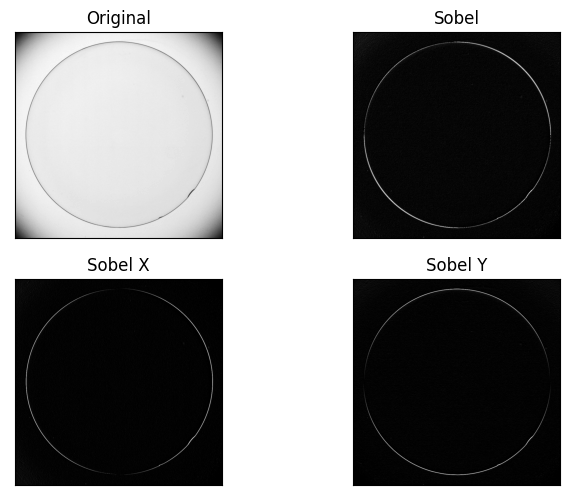

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('Fig0342.tif', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_8U, 0, 1, ksize=3)

figure(figsize=(8, 6), dpi=100)
plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_sobel_x + img_sobel_y, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_sobel_x, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel_y, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('coins.tif', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# La magnitud del gradiente es la raíz cuadrada de los gradientes al cuadrado en las direcciones x e y sumados.
magnitude = np.sqrt((img_sobel_x ** 2) + (img_sobel_y ** 2))

# La orientación del gradiente es la arcotangente de los gradientes en las direcciones x e y.
orientation = np.arctan2(img_sobel_y, img_sobel_x) * (180 / np.pi)

figure(figsize=(8, 6), dpi=100)
plt.subplot(2,2,1),plt.imshow(magnitude, cmap = 'gray')
plt.title('Magnitud del gradiente'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(orientation, cmap = 'gray')
plt.title('Dirección del gradiente'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_sobel_x, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel_y, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()